In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [8]:
print(df.Fuel_Type.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [9]:
print(df.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [13]:
print(df.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [19]:
#encoding data
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
df.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
df.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [27]:
x=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
x_test

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
99,2010,20.450,50024,1,0,0,0
161,2014,0.826,23000,0,1,0,0
89,2014,6.760,40000,0,0,0,0
30,2012,5.980,51439,1,0,0,0
232,2015,14.790,12900,0,0,1,0
...,...,...,...,...,...,...,...
172,2014,0.640,13700,0,1,0,0
94,2008,22.780,89000,0,0,1,0
160,2011,0.950,24000,0,1,0,0
199,2007,0.580,53000,0,1,0,0


In [31]:
y_test

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
       ...  
172     0.40
94      4.00
160     0.45
199     0.12
91     11.25
Name: Selling_Price, Length: 61, dtype: float64

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics #for accuracy and error calculation


In [34]:
#loading the model
lr=LinearRegression()

In [35]:
lr.fit(x_train, y_train)

LinearRegression()

In [36]:
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)

In [37]:
test_pred

array([10.39222503,  0.71269634,  4.26367425,  4.89542882,  9.84484784,
        4.22631808,  7.1173891 ,  7.37327394,  0.1592961 ,  5.16712598,
        6.20624893,  6.17414198,  2.11880837,  7.74045843,  1.92235986,
        1.71406658,  2.02899942,  1.8536463 ,  9.35171759,  4.2546458 ,
        1.48996098,  9.14496453,  1.45846216,  9.63402658,  0.82165042,
        8.07898502,  1.53763892, -3.19873666,  4.22373915,  2.09526116,
        3.42865389,  3.72427545,  5.58001877,  7.75879392, -1.91563192,
        6.80980082,  8.20694812,  5.81047156,  6.15629896,  6.27493028,
       16.02197751,  2.07455343,  1.04886513, -0.45830577,  6.82090538,
        6.78567581,  0.98725428,  6.83257783, 14.31925066,  3.01359825,
        8.04481951, -0.89441322,  8.99139759,  1.14814903,  2.1191082 ,
       -0.82919712,  0.68456956, 10.02743111, -0.46773344, -2.43254957,
       10.0831552 ])

In [38]:
train_pred

array([ 6.78487861e+00,  1.03052148e+00,  4.33053370e+00,  2.19376150e-02,
        3.57946207e+00,  2.79503372e+00,  1.43719894e+00,  4.14889545e-01,
        1.61166418e+00,  1.12839641e+00,  4.32086309e+00,  6.17477452e+00,
        9.29097627e-01,  7.35592155e-01,  6.15378778e+00,  3.42694561e+00,
        2.32984882e+00,  7.50014006e+00,  4.61811711e+00,  4.43437311e+00,
        4.45915634e+00,  2.73352428e+00,  4.44377264e+00,  1.71378422e+00,
        2.49318608e-01,  3.94331375e+00,  1.37445456e+00,  4.61754769e+00,
        1.38595068e+00,  7.35605367e+00,  7.24473016e+00,  6.54331682e+00,
        2.29055849e+00,  2.19058216e+01,  2.19873970e+00,  5.64492151e+00,
        2.82714047e+00,  7.68311323e+00,  5.67039850e+00,  1.00273475e+01,
        1.99828812e+00,  2.37716894e+00,  1.22731322e+00,  2.40303328e+00,
        9.94390646e+00,  2.01662591e+00, -6.42391420e-01,  5.42943934e+00,
        1.14107420e+01, -5.10458803e-03,  1.09479248e+00,  1.61329534e+00,
        5.38687939e+00,  

In [39]:
# R squared error
error_train = metrics.r2_score(y_train, train_pred)
error_train

0.8838169193709794

In [40]:
error_test = metrics.r2_score(y_test, test_pred)
error_test

0.8401532365377683

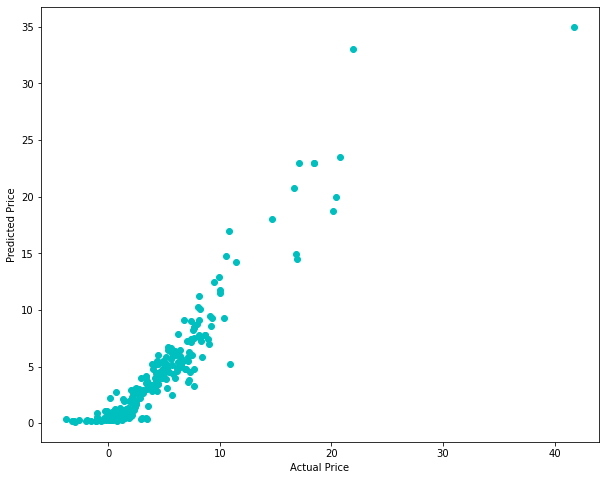

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(train_pred, y_train,color='c')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

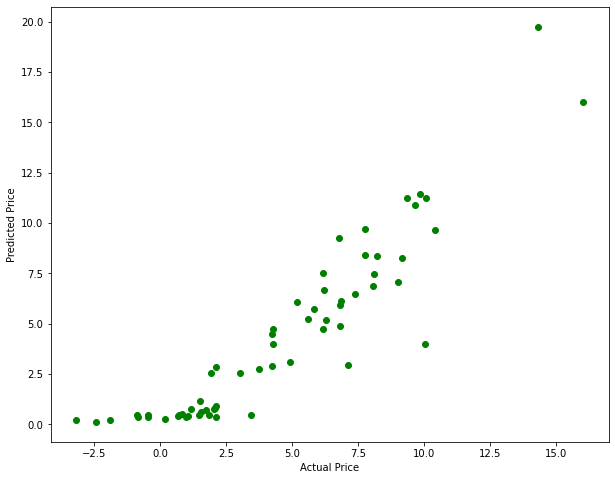

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(test_pred,y_test,color='g')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()